In [1]:
import csv
import statsmodels.api as sm
import copy
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.stats

# matplotlib Paramaters
from matplotlib import rc


sys.path.append('../src/')
from file_io import get_synfiles, load_synfile
from binary import get_presence, calc_norm_dens, calc_survival_fraction

rc("lines", linewidth=2)
rc("axes", lw=1)
rc("axes.spines", top=False)
rc("axes.spines", right=False)
rc("xtick.major", pad=5, width=1, size=5)
rc("ytick.major", pad=5, width=1, size=5)
rc("font", size=20)

In [2]:
# Returns the average value of synapses between the 40th and 60th percentile of all synapses on a given day

def get_avg(syn_by_day):
    qr = np.nanpercentile(syn_by_day, q=[40,60], interpolation="nearest", axis=0).T
    syn_sorted = np.sort(syn_by_day, axis=0)

    avg = []

    for i, q in enumerate(qr):
        syn_day = syn_sorted[:, i]
        gt = syn_day[syn_day >= q[0]]
        lt = gt[gt <= q[1]]
        avg.append(np.nanmean(lt))

    avg = np.array(avg)
    return avg

# Figure S3A,B

Differential bleaching of red and green channel signals over the course of 1-month

<ipython-input-3-aff5a3dc3e6a>:106: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "background" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/mnt/c/Users/Joshua Melander/Desktop/s3AB.svg',dpi=100,format='svg',background='transparent')


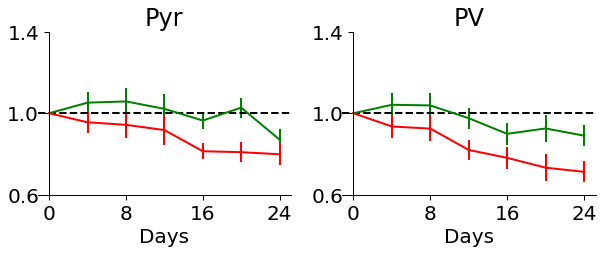

In [3]:
gpath = "../data/weights_by_dendrite/all_raw_pyr_green/"
gfiles = [f for f in os.listdir(gpath) if f.endswith('.npy')]

rpath = '../data/weights_by_dendrite/all_raw_pyr_red/'
rfiles = [f for f in os.listdir(rpath) if f.endswith('.npy')]

pyr_r = []
pyr_g = []

for f in rfiles:
    pyr_r.append(np.load(os.path.join(rpath,f)))
    pyr_g.append(np.load(os.path.join(gpath,f)))

gms = []
rms = []

for r,g in zip(pyr_r,pyr_g):
    g[g==0] = np.nan
    r[r==0] = np.nan
    
    gm = get_avg(g)
    rm = get_avg(r)

    
    gm = gm/gm[0]  
    rm = rm/rm[0]
    rms.append(rm)
    gms.append(gm)
    
pyr_rms=np.array(rms)[:,:7]
pyr_gms = np.array(gms)[:,:7]



gpath = "../data/weights_by_dendrite/all_raw_pv_green/"
gfiles = [f for f in os.listdir(gpath) if f.endswith('.npy')]

rpath = '../data/weights_by_dendrite/all_raw_pv_red/'
rfiles = [f for f in os.listdir(rpath) if f.endswith('.npy')]

pv_r = []
pv_g = []

for f in rfiles:
    pv_r.append(np.load(os.path.join(rpath,f)))
    pv_g.append(np.load(os.path.join(gpath,f)))

gms = []
rms = []

for r,g in zip(pv_r,pv_g):
    g[g==0] = np.nan
    r[r==0] = np.nan

    gm = get_avg(g)
    rm = get_avg(r)

    
    gm = gm/gm[0]  
    rm = rm/rm[0]

    
    rms.append(rm[:7])
    gms.append(gm[:7])
    
pv_rms=np.array(rms)
pv_gms = np.array(gms)


f,a = plt.subplots(1,2)
f.set_size_inches(10,3)

a[0].errorbar(x=range(7),y=np.mean(pyr_gms,axis=0),yerr=scipy.stats.sem(pyr_gms,axis=0),color='g')
a[0].errorbar(x=range(7),y=np.mean(pyr_rms,axis=0),yerr=scipy.stats.sem(pyr_gms,axis=0),color='r')

a[0].spines['left'].set_position(('data', 0))
a[0].spines['bottom'].set_position(('data', 0.6))

a[1].errorbar(x=range(7),y=np.mean(pv_gms,axis=0),yerr=scipy.stats.sem(pv_gms,axis=0),color='g')
a[1].errorbar(x=range(7),y=np.mean(pv_rms,axis=0),yerr=scipy.stats.sem(pv_gms,axis=0),color='r')

a[1].spines['left'].set_position(('data', 0))
a[1].spines['bottom'].set_position(('data', 0.6))

a[0].set_xlabel('Days')
a[0].set_ylim(0.6,1.4)
a[0].axhline(1,color='black',linestyle='--')

a[1].set_xlabel('Days')
a[1].set_ylim(0.6,1.4)
a[1].axhline(1,color='black',linestyle='--')

a[0].set_yticks([0.6,1,1.4])
a[1].set_yticks([0.6,1,1.4])

a[1].set_xticks([0,2,4,6])
a[1].set_xticklabels([0,8,16,24])
a[1].set_xlabel('Days')
a[0].set_xticks([0,2,4,6])
a[0].set_xticklabels([0,8,16,24])
a[0].set_xlabel('Days')

a[0].set_title('Pyr')
a[1].set_title('PV')
# f.tight_layout()
plt.savefig('/mnt/c/Users/Joshua Melander/Desktop/s3AB.svg',dpi=100,format='svg',background='transparent')

# Figure S3C,D

Green/Red ratio is prone to artifacts due to differential bleaching 

<ipython-input-4-14c4c188c9ad>:61: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "background" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/mnt/c/Users/Joshua Melander/Desktop/s3CD.svg',dpi=100,format='svg',background='transparent')


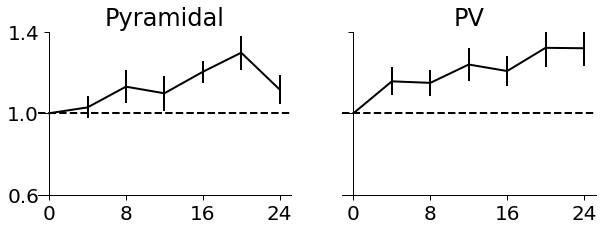

In [4]:
gr_ms = []
for g,r in zip(pyr_g,pyr_r):
    g[g==0] = np.nan
    r[g==0] = np.nan
    
    gr = g / r

    avg = get_avg(gr)
    grm = avg/avg[0]
    
    gr_ms.append(grm)
    
gr_ms = np.array(gr_ms)[:,:7]
gms = gr_ms

f,a = plt.subplots(1,2,sharey=True)
f.set_size_inches(10,3)

a[0].errorbar(x=range(7),y=np.mean(gms,axis=0),yerr=scipy.stats.sem(gms,axis=0),color='k')
a[0].spines['left'].set_position(('data', 0))
a[0].spines['bottom'].set_position(('data', 0.6))

a[0].set_yticks([0.6,1,1.4])
a[0].set_xticks(range(7))
a[0].set_ylim(0.6,1.4)

gr_ms = []
for g,r in zip(pv_g,pv_r):
    g[g==0] = np.nan
    r[g==0] = np.nan
    
    gr = g / r
#     print(gr.shape)

    avg = get_avg(gr)
    grm = avg/avg[0]
    
    gr_ms.append(grm[:7])
gms = gr_ms
    
gr_ms = np.array(gr_ms)
a[1].errorbar(x=range(7),y=np.mean(gms,axis=0),yerr=scipy.stats.sem(gms,axis=0),color='k')
a[1].spines['left'].set_position(('data', 0))
a[1].spines['bottom'].set_position(('data', 0.6))

a[1].set_yticks([0.6,1,1.4])
a[1].set_xticks(range(7))
a[1].set_ylim(0.6,1.4)

a[0].axhline(y=1,color='black',ls='--')
a[1].axhline(y=1,color='black',ls='--')

days = [0,8,16,24]
a[0].set_xticks([0,2,4,6])
a[0].set_xticklabels(days)
a[1].set_xticks([0,2,4,6])
a[1].set_xticklabels(days)
a[0].set_title('Pyramidal')
a[1].set_title('PV')

plt.savefig('/mnt/c/Users/Joshua Melander/Desktop/s3CD.svg',dpi=100,format='svg',background='transparent')
